# Transformation

In this example, we will transform an image using `glcm-cupy`.

In [12]:
# Here, we load in the array
import matplotlib.pyplot as plt
from matplotlib.image import imread
from mpl_toolkits.axes_grid1 import ImageGrid

## Image Read
Read the image and divide it by 16 to reduce runtime

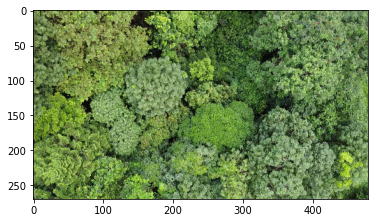

In [13]:
ar = imread("../../../data/image.jpg")[::4, ::4]
plt.imshow(ar)

## GLCM Transformation

### Option 1: Use `GLCM` to transform

We load `GLCM`, `Direction` and `Features`. The latter 2, self-explanatory, to specify arguments

- Set `directions` to only East & South East
- Set `features` to run only ASM & Contrast.
- Bin from 256 to 16, reducing run time
- Normalize Features to `[0, 1]`
- Allow `tqdm` to output progress
- Set Step Size to 1, Radius to 2.

In [14]:
from glcm_cupy import GLCM, Direction, Features

g = GLCM(
    directions=(Direction.EAST, Direction.SOUTH_EAST),
    features=(Features.ASM, Features.CONTRAST),
    bin_from=256, bin_to=16,
    normalized_features=True,
    verbose=True,
    step_size=1,
    radius=2
).run(ar)

GLCM Progress: 100%|██████████| 751k/751k [00:01<00:00, 673k Cells/s] 


### Option 2: Use `glcm` to transform

Alternatively, use the functional call

Notice how the number of cells is doubled, because by default, we use 4 directions!

In [15]:
from glcm_cupy import glcm

g = glcm(ar, bin_from=256, bin_to=16)  # Argument names are the same

GLCM Progress: 100%|██████████| 1.50M/1.50M [00:04<00:00, 347k Cells/s]


## Feature Extraction
After Transformation, extract features

### Option 1: Extract Features with `Features`

Each 2D channel is transformed into its own 2D GLCM Feature channel, with reduced height & width

In [16]:
# We yield the features using constants defined in conf
from glcm_cupy.conf import Features

print(g[..., Features.CONTRAST].shape, g[..., Features.CORRELATION].shape, g[..., Features.ASM].shape)

(264, 474, 3) (264, 474, 3) (264, 474, 3)


### Option 2: Extract Features with integers
Alternatively, since these constants are simply integers

You may inspect the source of `Features` to yield the integers

In [17]:
print(g[..., 0].shape, g[..., 1].shape, g[..., 2].shape)

(264, 474, 3) (264, 474, 3) (264, 474, 3)


## Plot Transformation

Plot features with `ImageGrid`.

Some features have extremely low values, thus we cube root it to spread it out.

Text(0.5, 0.98, 'GLCM Features (Cube Rooted for visibility)')

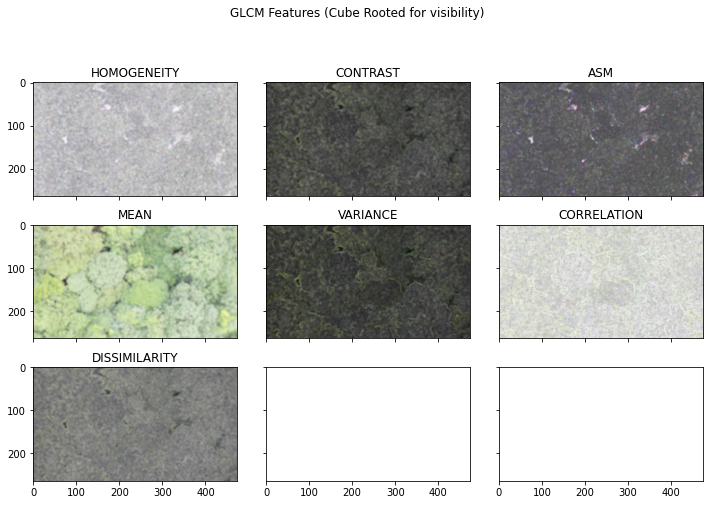

In [18]:
# Plot in a grid
fig = plt.figure(figsize=(12, 8))
grid = ImageGrid(fig, 111,
                 nrows_ncols=(3, 3),
                 axes_pad=0.4)

for ax, f_ix, title in zip(grid, range(g.shape[-1]),
                           ("HOMOGENEITY", "CONTRAST", "ASM", "MEAN",
                            "VARIANCE", "CORRELATION", "DISSIMILARITY"), ):
    ax.imshow(g[..., f_ix] ** (1 / 3))
    ax.set_title(title)
fig.suptitle('GLCM Features (Cube Rooted for visibility)')

## Summary

- You have learnt how `GLCM` and `glcm` transforms the image array
- The input criterion
- How to extract features
- The shape shrink of GLCM

### Things to Note

Not all features are significantly orthogonal.

It's best to research on which features to use or do feature selection to reduce run time of GLCM.